In [2]:
import pandas as pd

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
df=pd.read_csv("data_proportional.csv",names=["right","down","left","up","total_passed","avg_wt_time"])

In [6]:
df.head()

,right,down,left,up,total_passed,avg_wt_time
0,6,5,0,1,12,2
1,42,57,15,11,125,4
2,85,99,29,21,234,6
3,124,146,40,31,341,8
4,173,187,49,40,449,9


In [7]:
right=np.array(df['right']).reshape(-1, 1)
down=np.array(df['down']).reshape(-1, 1)
left=np.array(df['left']).reshape(-1, 1)
up=np.array(df['up']).reshape(-1, 1)
total_passed=np.array(df['total_passed']).reshape(-1, 1)
x=np.array(np.arange(0,90,1)).reshape(-1, 1)

In [8]:
right_X_train, right_X_test, right_y_train, right_y_test=train_test_split(x, right, test_size=0.33, random_state=42)

In [9]:
# right_model = LinearRegression().fit(x, right)
# down_model = LinearRegression().fit(x, down)
# left_model = LinearRegression().fit(x, left)
# up_model = LinearRegression().fit(x, up)

In [10]:
# right_model.predict(np.array([78]).reshape(-1,1))[0][0]

In [11]:
from sklearn.metrics import mean_squared_error

In [12]:
right_X_train, right_X_test, right_y_train, right_y_test=train_test_split(x, right, test_size=0.33, random_state=42)
right_model = LinearRegression().fit(right_X_train, right_y_train)
right_model_score=right_model.score(right_X_test,right_y_test)

In [13]:
down_X_train, down_X_test, down_y_train, down_y_test=train_test_split(x, down, test_size=0.33, random_state=42)
down_model = LinearRegression().fit(down_X_train, down_y_train)
down_model_score=down_model.score(down_X_test,down_y_test)

In [14]:
left_X_train, left_X_test, left_y_train, left_y_test=train_test_split(x, left, test_size=0.33, random_state=42)
left_model = LinearRegression().fit(left_X_train, left_y_train)
left_model_score=left_model.score(left_X_test,left_y_test)

In [15]:
up_X_train, up_X_test, up_y_train, up_y_test=train_test_split(x, up, test_size=0.33, random_state=42)
up_model = LinearRegression().fit(up_X_train, up_y_train)
up_model_score=up_model.score(up_X_test,up_y_test)

In [16]:
print("Accuracy score of prediction of vehicles on Right Road : ",right_model_score*100)
print("Accuracy score of prediction of vehicles on down Road : ",down_model_score*100)
print("Accuracy score of prediction of vehicles on left Road : ",left_model_score*100)
print("Accuracy score of prediction of vehicles on Up Road : ",up_model_score*100)

Accuracy score of prediction of vehicles on Right Road :  99.97336933197799
Accuracy score of prediction of vehicles on down Road :  99.99675232760953
Accuracy score of prediction of vehicles on left Road :  99.94306828076682
Accuracy score of prediction of vehicles on Up Road :  99.91552349209786


In [17]:
total_passed_X_train, total_passed_X_test, total_passed_y_train, total_passed_y_test=train_test_split(x, total_passed, test_size=0.33, random_state=42)
total_passed_model = LinearRegression().fit(total_passed_X_train, total_passed_y_train)
total_passed_model_score=total_passed_model.score(total_passed_X_test,total_passed_y_test)
print(total_passed_model_score)

0.9999942904891655


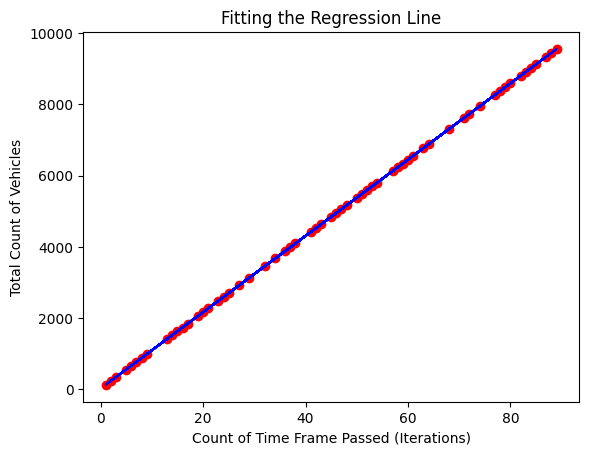

In [18]:
import matplotlib.pyplot as plt
# figure(figsize=(2560/200,1600/200), dpi=200)
plt.scatter(total_passed_X_train, total_passed_y_train,color='r')
plt.plot(total_passed_X_train, total_passed_model.predict(total_passed_X_train),color='b')
plt.xlabel("Count of Time Frame Passed (Iterations)")
plt.ylabel("Total Count of Vehicles")

plt.title("Fitting the Regression Line")
plt.savefig("regressionLine.jpg")
plt.show()

## Analysis and Comparison of All algorithms

In [19]:
import pandas as pd,matplotlib.pyplot as plt,seaborn as sns

In [20]:
cols=["Lane1","Lane2","Lane3","Lane4","Total","AWT"]
static=pd.read_csv("data_static.csv",names=cols)
prop=pd.read_csv("data_proportional.csv",names=cols)

In [21]:
from matplotlib.pyplot import figure

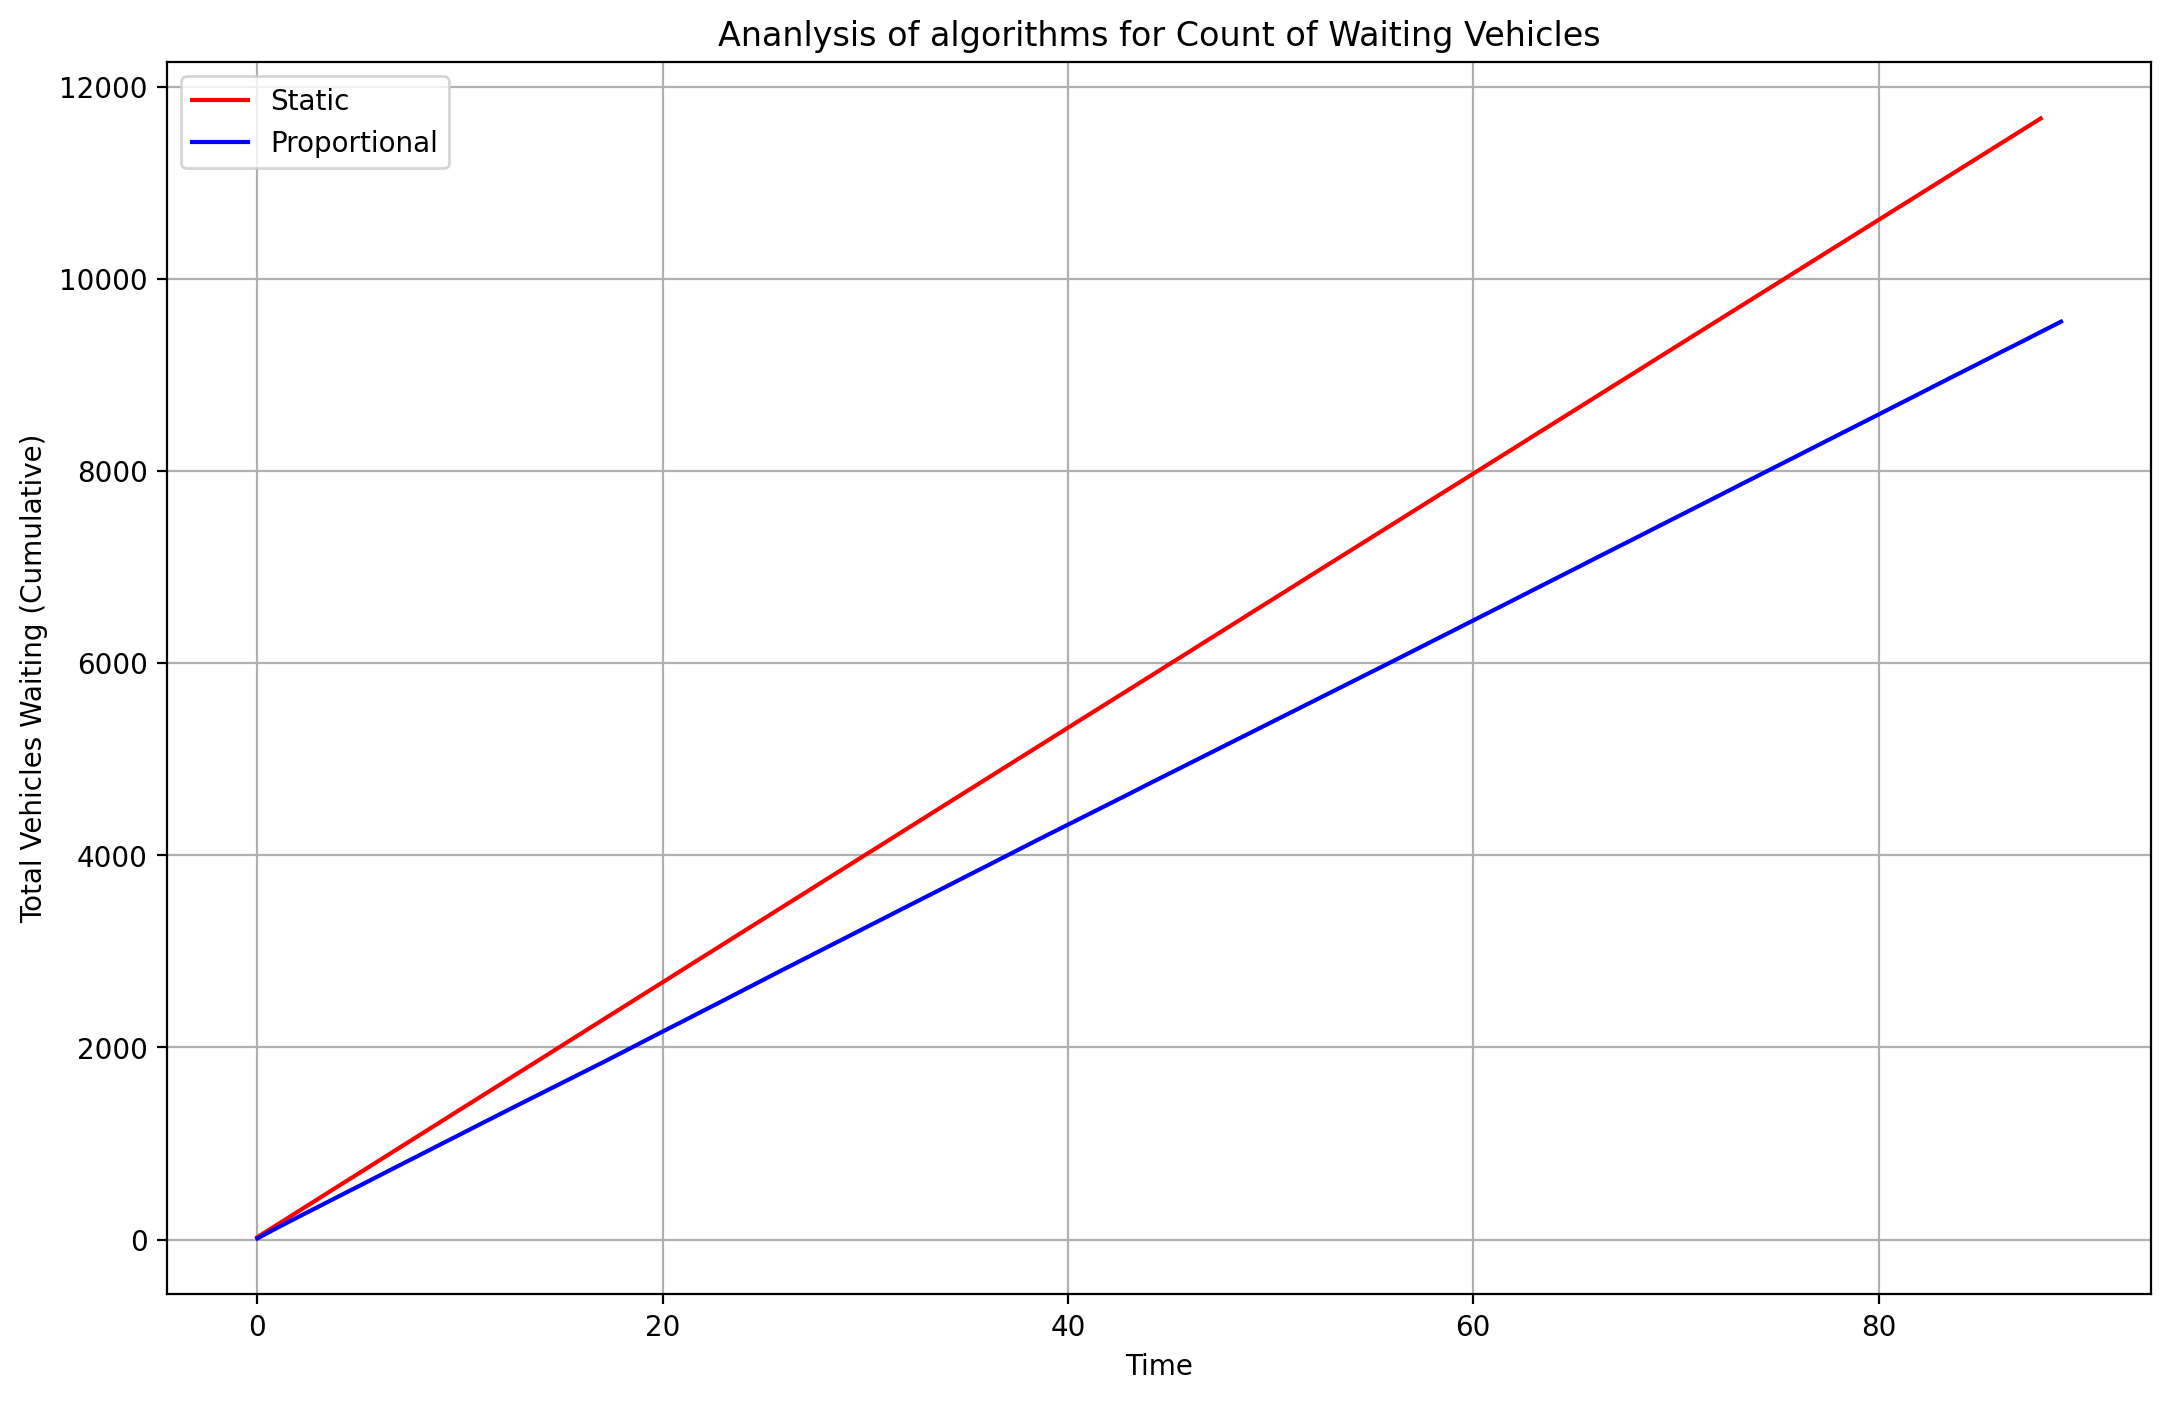

In [22]:
figure(figsize=(2560/200,1600/200), dpi=200)
plt.plot(list(static.index),static['Total'],label="Static",color="red")
plt.plot(list(prop.index),prop['Total'],label="Proportional",color="blue")
plt.xlabel("Time")
plt.ylabel("Total Vehicles Waiting (Cumulative)")
plt.title("Ananlysis of algorithms for Count of Waiting Vehicles")
plt.grid()
plt.legend(loc=0)
plt.savefig("VehicleCount.jpg")

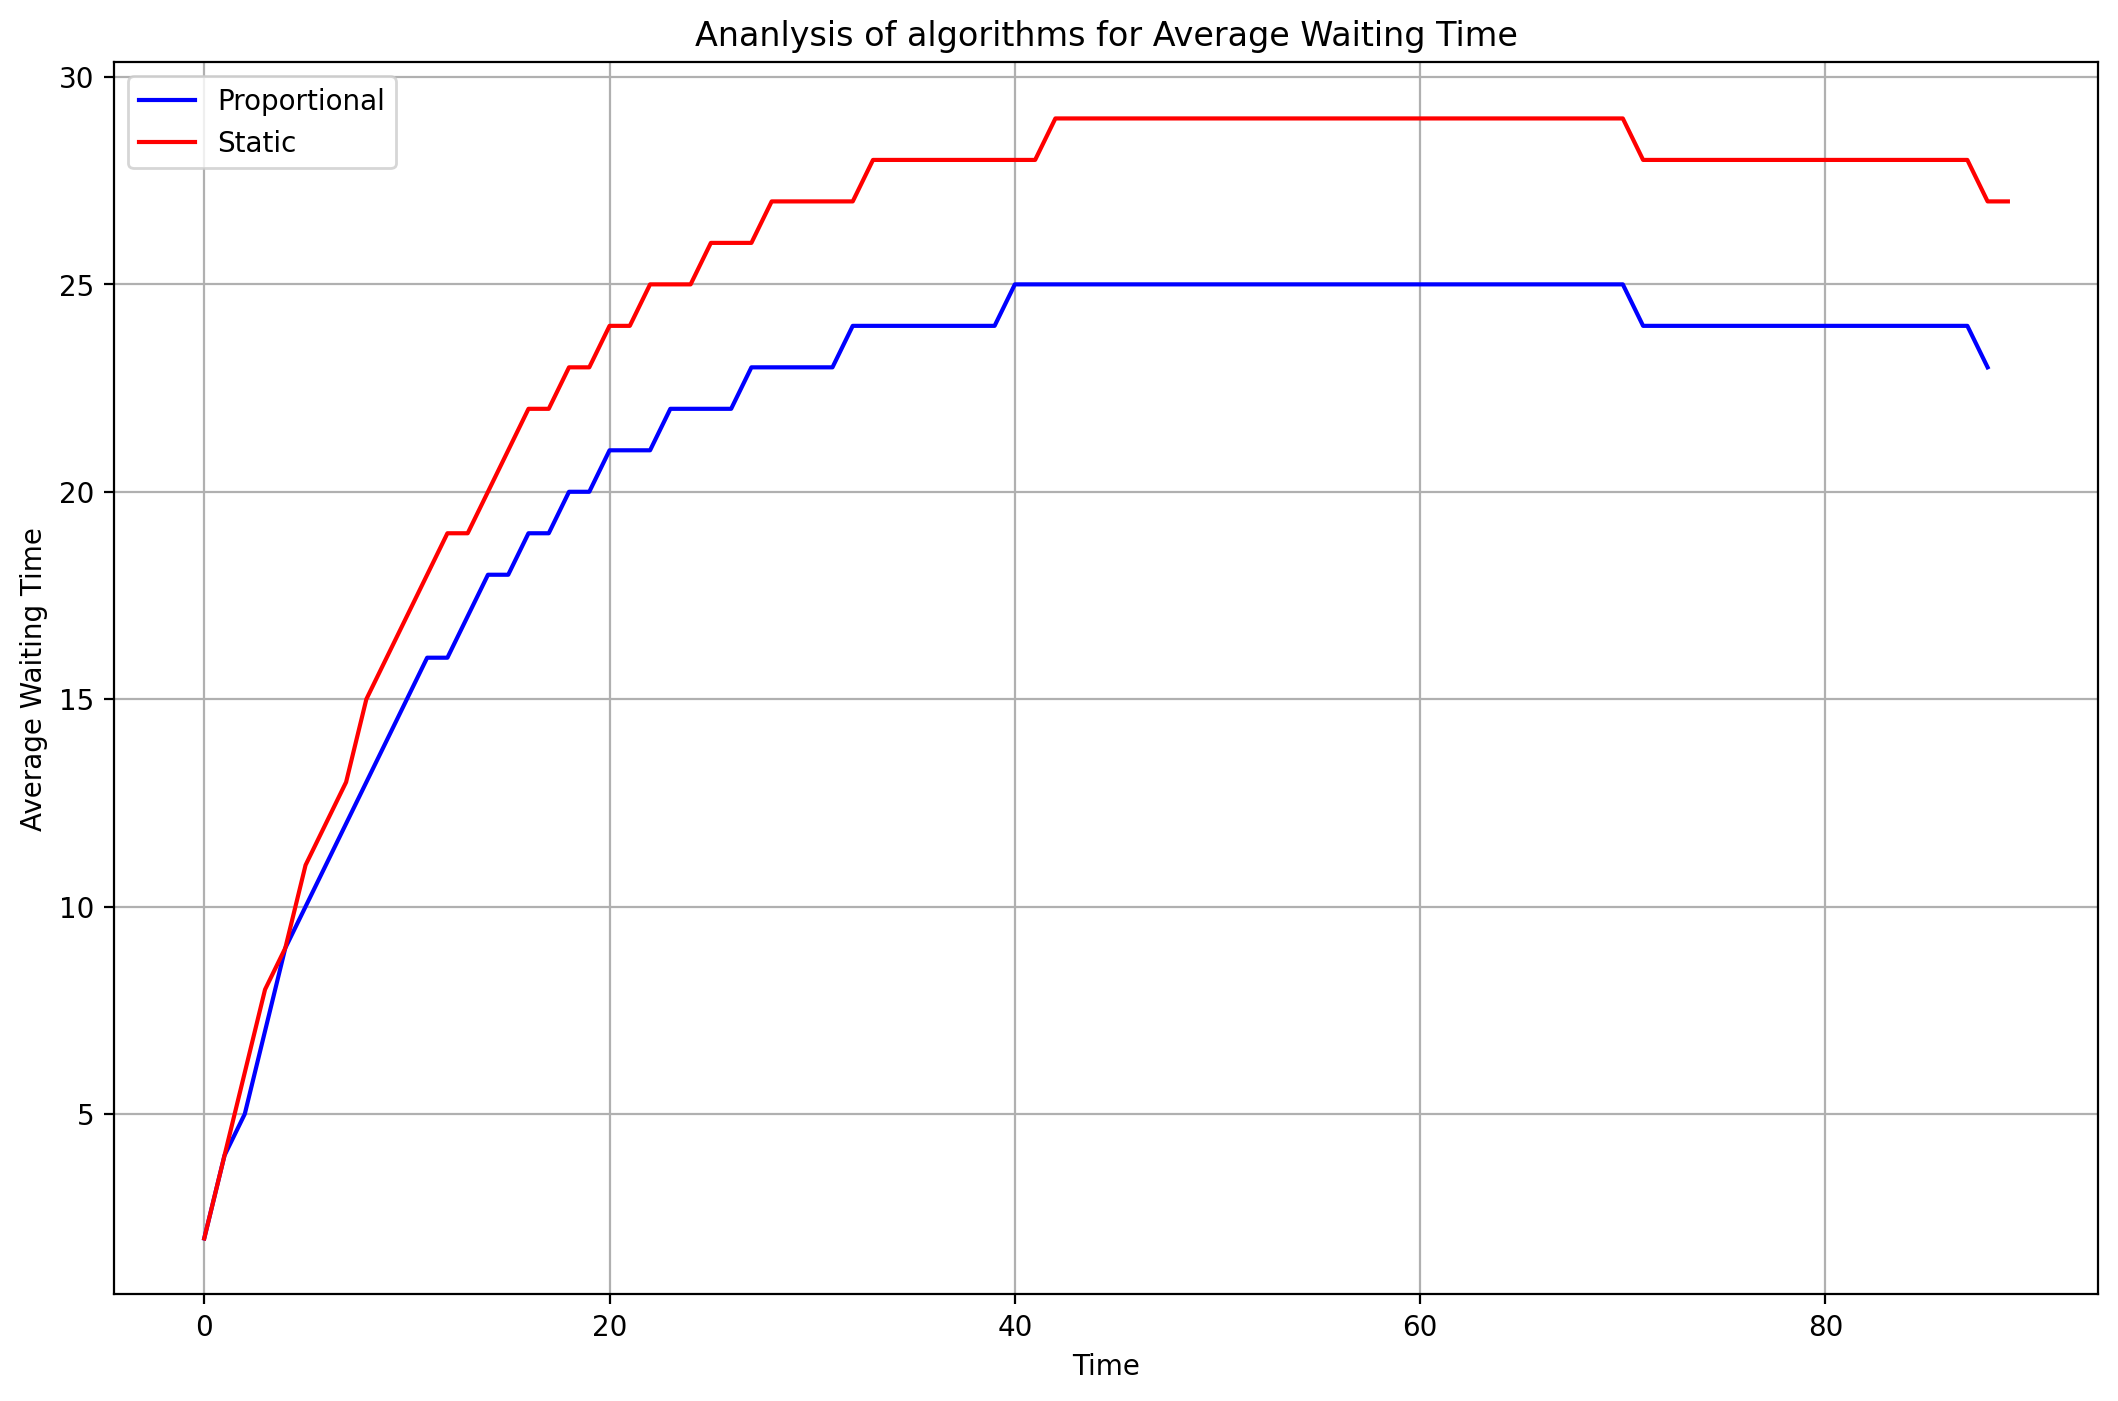

In [23]:
figure(figsize=(2560/200,1600/200), dpi=200)
plt.plot(list(static.index),static['AWT'],label="Proportional",color="blue")
plt.plot(list(prop.index),prop['AWT'],label="Static",color="red")
plt.xlabel("Time")
plt.ylabel("Average Waiting Time")
plt.title("Ananlysis of algorithms for Average Waiting Time")
plt.grid()
plt.legend(loc=0)
plt.savefig("AWT.jpg")

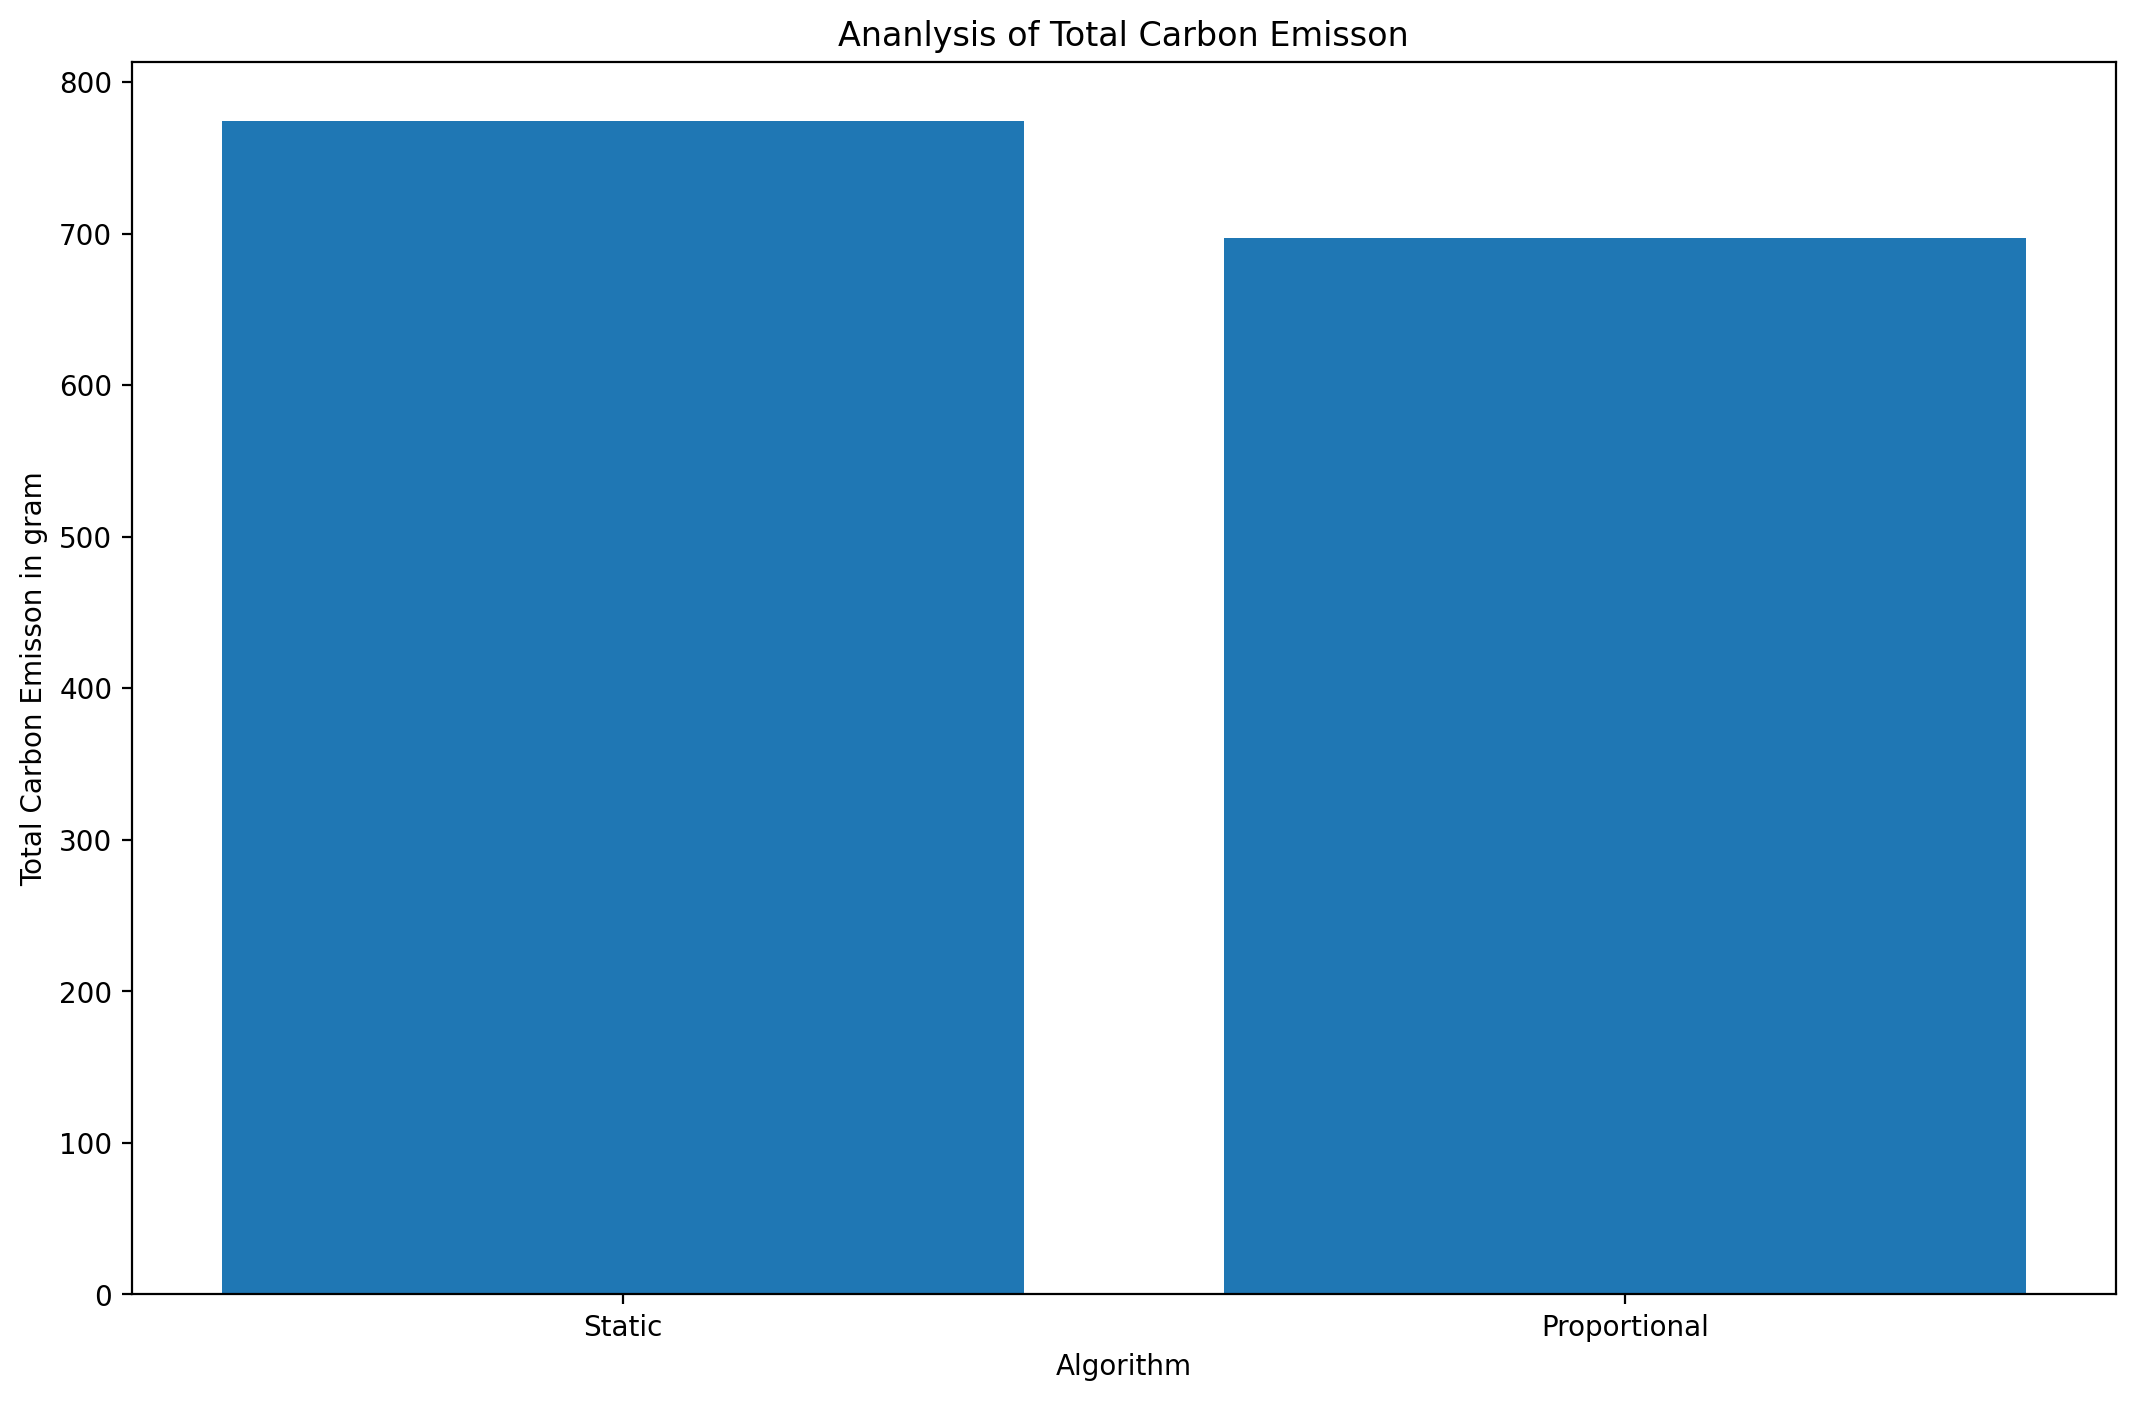

In [24]:
figure(figsize=(2560/200,1600/200), dpi=200)
ce={"Static":774.23,"Proportional":697.35 }
plt.xlabel("Algorithm")
plt.ylabel("Total Carbon Emisson in gram")
plt.title("Ananlysis of Total Carbon Emisson")
plt.bar(list(ce.keys()),(ce.values()))
plt.savefig("Carbon_Emisson.jpg")

In [25]:
ce={"Algorithm":["Static","Proportional"],"CarbonEmisson":[814.3896,697.35]}
df_ce=pd.DataFrame.from_dict(ce)

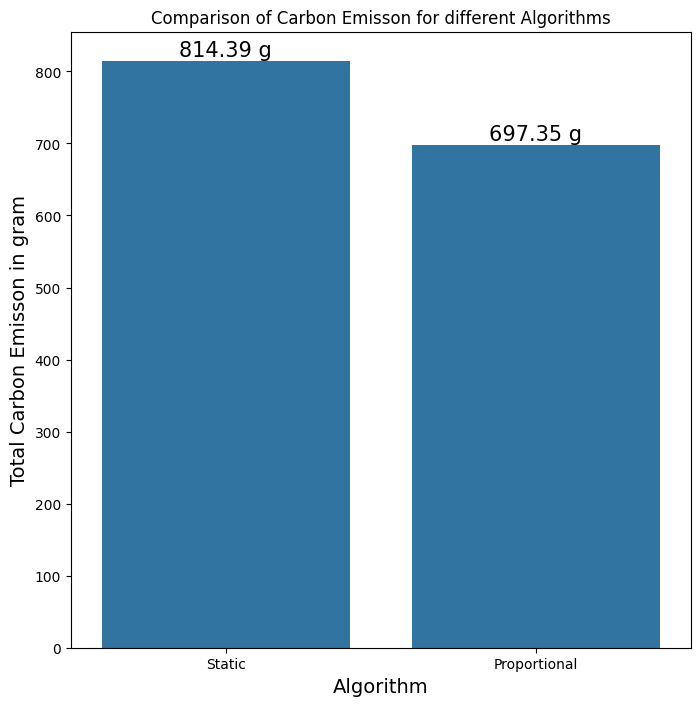

In [26]:
plt.figure(figsize=(8, 8))
 
plots = sns.barplot(x="Algorithm", y="CarbonEmisson",data=df_ce)
 
# Iterating over the bars one-by-one
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f')+' g',
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
 
plt.xlabel("Algorithm", size=14)
 
# Setting the label for y-axis
plt.ylabel("Total Carbon Emisson in gram", size=14)
 
# Setting the title for the graph
plt.title("Comparison of Carbon Emisson for different Algorithms")

plt.savefig("CarbonEmisson.jpg")
# Finally showing the plot
plt.show()


In [27]:
import matplotlib.pyplot as plt
import numpy as np

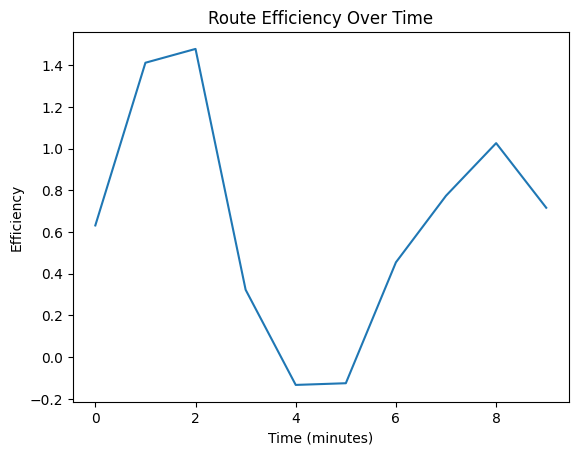

In [28]:
# Simulate route efficiency over time
time_intervals = np.arange(0, 10, 1)
efficiency = np.sin(time_intervals) + np.random.random(10)

plt.plot(time_intervals, efficiency)
plt.title('Route Efficiency Over Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Efficiency')
plt.show()